## Sistem Rekomendasi untuk Destinasi Wisata di Indonesia

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "/content/dataset"

info_tourism = pd.read_csv(f"{DATA_PATH}/tourism_with_id.csv")
tourism_rating = pd.read_csv(f"{DATA_PATH}/tourism_rating.csv")
users = pd.read_csv(f"{DATA_PATH}/user.csv")

In [2]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
256,257,Monumen Bandung Lautan Api,"Monumen Bandung Lautan Api, merupakan monumen ...",Budaya,Bandung,0,4.3,NaN,"{'lat': -6.9338497, 'lng': 107.604925}",-6.933850,107.604925,NaN,257
131,132,Air Terjun Kedung Pedut,Air Terjun Kedung Pedut atau biasa disebut Cur...,Cagar Alam,Yogyakarta,20000,4.5,60.0,"{'lat': -7.769987499999998, 'lng': 110.1210707}",-7.769988,110.121071,NaN,132
144,145,Desa Wisata Rumah Domes/Teletubbies,Kawasan desa teletubbies menjadi perhatian men...,Taman Hiburan,Yogyakarta,5000,4.1,60.0,"{'lat': -7.813608499999999, 'lng': 110.5033442}",-7.813608,110.503344,NaN,145
79,80,Plaza Indonesia,Plaza Indonesia diresmikan pada awal tahun 199...,Pusat Perbelanjaan,Jakarta,0,4.7,120.0,"{'lat': -6.193925900000002, 'lng': 106.8222158}",-6.193926,106.822216,NaN,80
136,137,Wisata Alam Kalibiru,Kalibiru sebenarnya adalah sebuah nama hutan y...,Cagar Alam,Yogyakarta,20000,4.4,90.0,"{'lat': -7.8057305, 'lng': 110.127969}",-7.805731,110.127969,NaN,137


In [3]:
tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
5550,168,326,4
7073,212,140,4
4768,144,38,4
4587,140,46,4
7995,240,170,2


In [4]:
users.sample(5)

,User_Id,Location,Age
50,51,"Bogor, Jawa Barat",29
1,2,"Bekasi, Jawa Barat",21
276,277,"Jakarta Utara, DKI Jakarta",29
297,298,"Bogor, Jawa Barat",38
39,40,"Semarang, Jawa Tengah",27


In [5]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


In [6]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [7]:
info_tourism.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [8]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
tourism_rating.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [11]:
users.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [12]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

### Data Preprocessing

In [13]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [14]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [15]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category","Price"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,35000
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,2000
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,25000
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,0


In [16]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [17]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,35000,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,2000,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,25000,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,0,Bandung Tempat Ibadah


### Data Preparation

In [18]:
all_tourism.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
City,0
Category,0
Price,0
city_category,0


In [19]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,5000,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,5000,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,150000,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,4000,Jakarta Cagar Alam


In [20]:
place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

price = preparation.Price.tolist()

In [21]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category,
    "price":price
})

tourism_new

,id,name,category,description,city,city_category,price
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya,75000
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari,3000
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan,94000
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya,10000
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya,0
...,...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya,5000
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari,5000
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari,150000
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam,4000


<ipython-input-60-0add335f7898>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Place_Name', y='Rating_Count', data=top_10, palette='viridis')


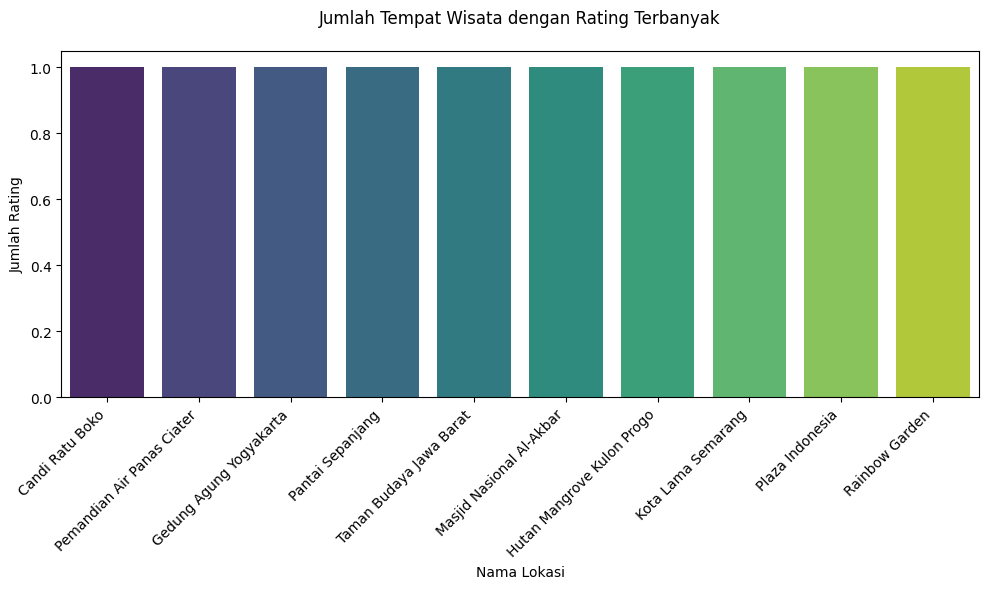

In [60]:
# First, let's extract the top 10 locations based on the rating count
top_10 = tourism_new['id'].value_counts().reset_index()
top_10.columns = ['Place_Id', 'Rating_Count']  # Rename the columns for clarity
top_10 = top_10[0:10]  # Select top 10

# Now, merge the data with place names
top_10 = pd.merge(top_10, preparation[['Place_Id', 'Place_Name']], how='left', on='Place_Id')

# Now, create the plot
plt.figure(figsize=(10,6))
sns.barplot(x='Place_Name', y='Rating_Count', data=top_10, palette='viridis')

# Set the plot title and labels
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()


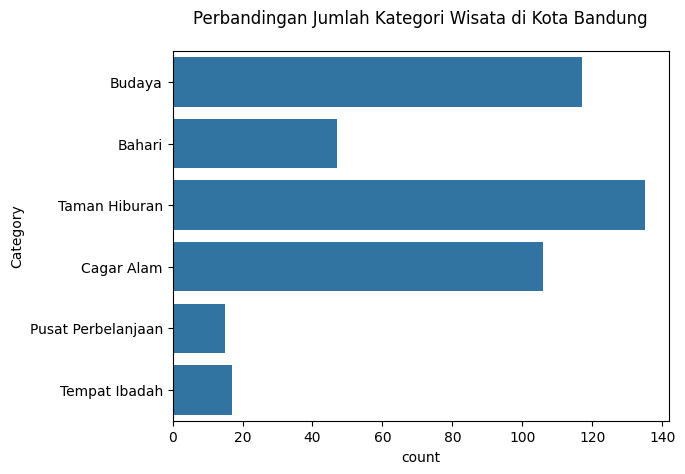

In [23]:
sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

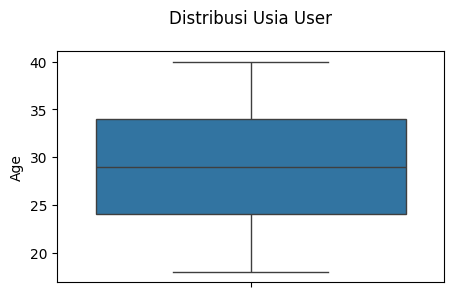

In [24]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

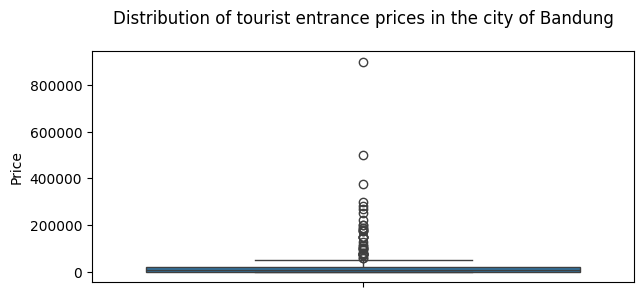

In [25]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribution of tourist entrance prices in the city of Bandung', pad=20)
plt.show()

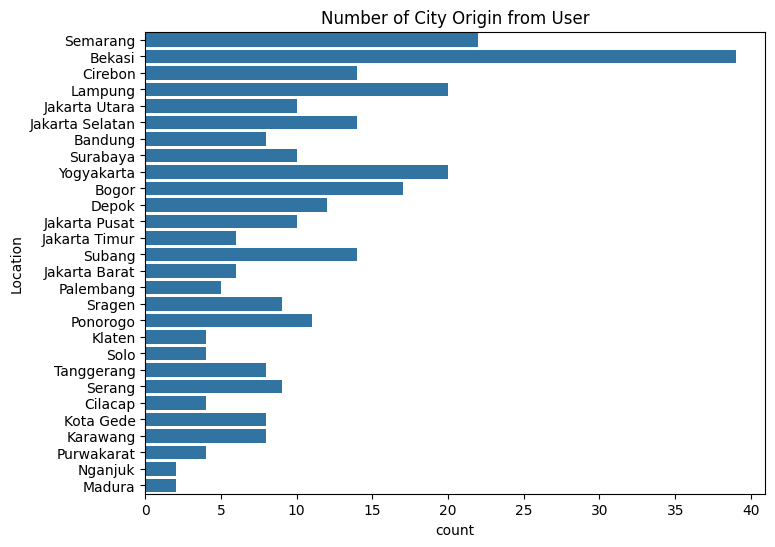

In [26]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the origin of the city from the user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of City Origin from User')
plt.show()

### Content Based Filtering

In [27]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category,price
280,256,Wisata Batu Kuda,Cagar Alam,Kawasan Batu Kuda berupa perbukitan dengan hut...,Bandung,Bandung Cagar Alam,10000
392,122,Watu Goyang,Budaya,Watu Goyang ini berasal dari Bahasa Jawa yang ...,Yogyakarta,Yogyakarta Budaya,2500
130,266,Caringin Tilu,Cagar Alam,"Bandung tidak pernah kehilangan pesonanya, wis...",Bandung,Bandung Cagar Alam,0
226,94,Sumur Gumuling,Taman Hiburan,Sumur Gumuling adalah salah satu tempat untuk ...,Yogyakarta,Yogyakarta Taman Hiburan,7000
308,34,Pasar Taman Puring,Pusat Perbelanjaan,Taman Puring bukanlah taman secara harfiah. Se...,Jakarta,Jakarta Pusat Perbelanjaan,0


### TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [29]:
cv_matrix = cv.transform(data['city_category'])

cv_matrix.shape

(437, 15)

In [30]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [31]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Wisata Kuliner Pecenongan,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
Pantai Parangtritis,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Pantai Indrayanti,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
Taman Bungkul,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
Jurang Tembelan Kanigoro,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


### Cosine Similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [33]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Museum Gedung Sate,Jembatan Biru Ambarawa,Gereja Perawan Maria Tak Berdosa Surabaya,Desa Wisata Gamplong,Hutan Wisata Tinjomoyo Semarang
name,,,,,
Wisata Kaliurang,0.000000,0.000000,0.000000,0.333333,0.666667
Perpustakaan Nasional,0.500000,0.000000,0.000000,0.000000,0.000000
Babakan Siliwangi City Forest Path Bandung,0.408248,0.000000,0.000000,0.000000,0.666667
Museum Sri Baduga,1.000000,0.000000,0.000000,0.000000,0.000000
Dago Dreampark,0.408248,0.666667,0.000000,0.666667,0.000000
Kawah Rengganis Cibuni,0.408248,0.000000,0.000000,0.000000,0.666667
Museum Pos Indonesia,1.000000,0.000000,0.000000,0.000000,0.000000
Balai Kota Surabaya,0.500000,0.000000,0.408248,0.000000,0.000000
Museum Sonobudoyo Unit I,0.500000,0.000000,0.000000,0.408248,0.000000


### Recommendation

In [34]:
def generate_candidates(city=None, max_price=None, items=data[['id', 'name', 'category', 'description', 'city', 'price']]):
    filtered_items = items
    if city:
        filtered_items = filtered_items[filtered_items['city'] == city]
    if max_price:
        filtered_items = filtered_items[filtered_items['price'] <= max_price]
    return filtered_items

In [35]:
# tourism_recommendations("Air Mancur Menari")
generate_candidates(city="Bandung", max_price=100000).head(5)

,id,name,category,description,city,price
5,312,Taman Hutan Raya Ir. H. Juanda,Cagar Alam,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Bandung,11000
6,258,Museum Gedung Sate,Budaya,Salah satu museum yang menjadi ikon kota ini a...,Bandung,5000
17,292,Curug Anom,Cagar Alam,Curug Anom adalah sebuah air terjun yang memil...,Bandung,0
18,222,Museum Konferensi Asia Afrika,Budaya,Museum Konferensi Asia Afrika merupakan salah ...,Bandung,0
22,246,Curug Tilu Leuwi Opat,Cagar Alam,Curug Tilu Leuwi Opat merupakan salah satu wis...,Bandung,10000


In [36]:
# tourism_recommendations("Trans Studio Bandung")
generate_candidates("Surabaya", 110000).head(5)

,id,name,category,description,city,price
9,393,Taman Harmoni Keputih,Cagar Alam,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Surabaya,0
13,405,Surabaya North Quay,Taman Hiburan,Surabaya menjadi kota besar yang sering menjad...,Surabaya,50000
20,428,Monumen Bambu Runcing Surabaya,Budaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Surabaya,0
39,413,Museum TNI AL Loka Jala Crana,Budaya,Museum Loka Jala Crana berdiri pada tanggal 19...,Surabaya,2000
41,437,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,10000


### Collaborative Filtering

In [37]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [38]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


### Data Preparation

**Encode**

In [39]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [40]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [41]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [42]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


**Train Test Split**

In [43]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [44]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


In [46]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [47]:
model = RecommenderNet(num_users, num_place, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [48]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.6949 - root_mean_squared_error: 0.3466 - val_loss: 0.6971 - val_root_mean_squared_error: 0.3476
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6860 - root_mean_squared_error: 0.3418 - val_loss: 0.6982 - val_root_mean_squared_error: 0.3484
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6819 - root_mean_squared_error: 0.3372 - val_loss: 0.6986 - val_root_mean_squared_error: 0.3486
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6738 - root_mean_squared_error: 0.3333 - val_loss: 0.6985 - val_root_mean_squared_error: 0.3485
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6723 - root_mean_squared_error: 0.3308 - val_loss: 0.6984 - val_root_mean_squared_error: 0.3484
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6728 - root_mean_squared_error: 0.3266 - val_loss: 0.6994 - val_root_mean_squared_error: 0.3490
Epoch 7/100
1000/1000 ━━━━━━━━━━━

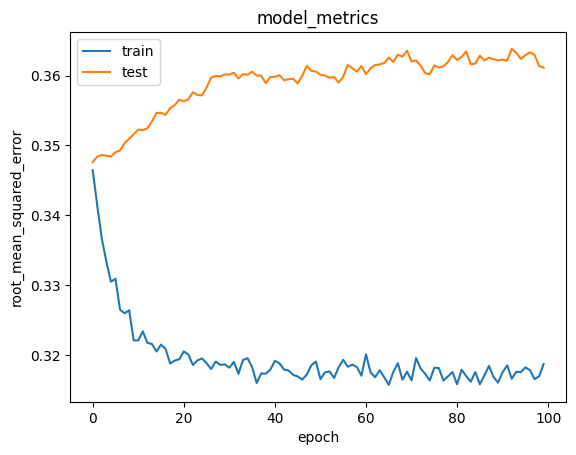

In [49]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Recommendation**

In [50]:
place_df = tourism_new
df = pd.read_csv(f'{DATA_PATH}/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [51]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Showing recommendations for users: 59
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category,price
5,312,Taman Hutan Raya Ir. H. Juanda,Cagar Alam,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Bandung,Bandung Cagar Alam,11000
17,292,Curug Anom,Cagar Alam,Curug Anom adalah sebuah air terjun yang memil...,Bandung,Bandung Cagar Alam,0
107,68,Pasar Petak Sembilan,Pusat Perbelanjaan,"Pecinan Glodok, tepatnya di Pasar Petak Sembil...",Jakarta,Jakarta Pusat Perbelanjaan,0
142,298,Gunung Lalakon,Cagar Alam,Gunung Lalakon merupakan sebuah gunung yang te...,Bandung,Bandung Cagar Alam,0
347,338,Lawang Sewu,Budaya,"Lawang Sewu (""Seribu Pintu"") (bahasa Jawa: ꦭꦮꦁ...",Semarang,Semarang Budaya,10000


In [52]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category,price
52,18,Museum Bank Indonesia,Budaya,Museum Bank Indonesia adalah sebuah museum di ...,Jakarta,Jakarta Budaya,2000
102,97,Monumen Yogya Kembali,Budaya,Museum Monumen Yogya Kembali (bahasa Jawa: ꦩꦺꦴ...,Yogyakarta,Yogyakarta Budaya,15000
184,253,Selasar Sunaryo Art Space,Taman Hiburan,Selasar Sunaryo Art Space (SSAS) adalah sebuah...,Bandung,Bandung Taman Hiburan,25000
226,94,Sumur Gumuling,Taman Hiburan,Sumur Gumuling adalah salah satu tempat untuk ...,Yogyakarta,Yogyakarta Taman Hiburan,7000
280,256,Wisata Batu Kuda,Cagar Alam,Kawasan Batu Kuda berupa perbukitan dengan hut...,Bandung,Bandung Cagar Alam,10000
301,261,Ciwangun Indah Camp Official,Cagar Alam,Ciwangun Indah Camp atau CIC adalah sebuah tem...,Bandung,Bandung Cagar Alam,10000
370,263,Curug Batu Templek,Cagar Alam,Curug Batu Templek Bandung adalah sebuah wisat...,Bandung,Bandung Cagar Alam,5000
373,401,Taman Keputran,Taman Hiburan,"Ntah, mengapa nama taman ini disebut dengan ta...",Surabaya,Surabaya Taman Hiburan,0
397,254,Teras Cikapundung BBWS,Taman Hiburan,Teras Cikapundung Bandung sebelumnya merupakan...,Bandung,Bandung Taman Hiburan,0
400,1,Monumen Nasional,Budaya,Monumen Nasional atau yang populer disingkat d...,Jakarta,Jakarta Budaya,20000
